<a href="https://colab.research.google.com/github/Lyumin80224/lyumin80224.github.io/blob/main/%E7%B5%B1%E8%A8%881023HW_09%E7%BE%85%E6%AF%93%E5%BF%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11/23作業 09羅毓忞

# 載入套件

In [1]:
import numpy as np
import pandas as pd
import random

資料輸入

In [2]:
from google.colab import files
uploaded=files.upload()

Saving exercise.csv to exercise (5).csv


In [3]:
data=pd.read_csv('exercise.csv',header=0)
data.head()

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
0,1,1,0,2,1,3.6,3.0,291.0
1,2,0,0,0,1,0.6,1.0,37.0
2,3,0,1,0,1,7.2,2.0,282.0
3,4,0,1,2,1,3.6,1.0,118.0
4,5,1,0,0,1,9.5,3.0,924.0


# 檢查空值

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   座號      50 non-null     int64  
 1   頂大      50 non-null     int64  
 2   性別      50 non-null     int64  
 3   高中      50 non-null     int64  
 4   補習科目數   50 non-null     int64  
 5   每日讀書時間  50 non-null     float64
 6   區域      49 non-null     float64
 7   成績排名    49 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 3.2 KB


In [5]:
dm=data

In [6]:
print(dm.isnull())

       座號     頂大     性別     高中  補習科目數  每日讀書時間     區域   成績排名
0   False  False  False  False  False   False  False  False
1   False  False  False  False  False   False  False  False
2   False  False  False  False  False   False  False  False
3   False  False  False  False  False   False  False  False
4   False  False  False  False  False   False  False  False
5   False  False  False  False  False   False  False  False
6   False  False  False  False  False   False  False  False
7   False  False  False  False  False   False  False  False
8   False  False  False  False  False   False  False  False
9   False  False  False  False  False   False  False  False
10  False  False  False  False  False   False  False  False
11  False  False  False  False  False   False  False  False
12  False  False  False  False  False   False  False  False
13  False  False  False  False  False   False  False  False
14  False  False  False  False  False   False  False  False
15  False  False  False  False  False   

In [7]:
print(dm.isnull().sum())

座號        0
頂大        0
性別        0
高中        0
補習科目數     0
每日讀書時間    0
區域        1
成績排名      1
dtype: int64


In [8]:
print(dm[dm.區域.isnull()])

    座號  頂大  性別  高中  補習科目數  每日讀書時間  區域   成績排名
48  49   0   1   1      3     3.6 NaN  339.0


In [9]:
print(dm[dm.成績排名.isnull()])

    座號  頂大  性別  高中  補習科目數  每日讀書時間   區域  成績排名
49  50   1   0   1      4     7.7  1.0   NaN


## 填補（天真）預測法

### 類別資料：頻率高

In [10]:
dm2=dm
print(dm2.區域.value_counts())
dm2.區域 = dm2.區域.fillna(1)
dm3=pd.DataFrame(dm2)
dm3

1.0    21
2.0    10
3.0     9
4.0     5
5.0     4
Name: 區域, dtype: int64


,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
0,1,1,0,2,1,3.6,3.0,291.0
1,2,0,0,0,1,0.6,1.0,37.0
2,3,0,1,0,1,7.2,2.0,282.0
3,4,0,1,2,1,3.6,1.0,118.0
4,5,1,0,0,1,9.5,3.0,924.0
5,6,1,1,2,1,0.4,1.0,4.0
6,7,0,0,1,2,11.3,1.0,644.0
7,8,0,0,0,2,1.8,2.0,116.0
8,9,0,0,1,2,0.5,1.0,16.0
9,10,0,0,1,3,23.0,2.0,349.0


### 數值資料：插補

In [11]:
dm3.成績排名 = dm3.成績排名.fillna((dm3['成績排名'].median())) # median()
dm4=pd.DataFrame(dm3)
dm4

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
0,1,1,0,2,1,3.6,3.0,291.0
1,2,0,0,0,1,0.6,1.0,37.0
2,3,0,1,0,1,7.2,2.0,282.0
3,4,0,1,2,1,3.6,1.0,118.0
4,5,1,0,0,1,9.5,3.0,924.0
5,6,1,1,2,1,0.4,1.0,4.0
6,7,0,0,1,2,11.3,1.0,644.0
7,8,0,0,0,2,1.8,2.0,116.0
8,9,0,0,1,2,0.5,1.0,16.0
9,10,0,0,1,3,23.0,2.0,349.0


# 不平衡處理

In [12]:
cols = ['頂大']

In [13]:
from collections import Counter
import pandas as pd
result = dm4[cols].apply(pd.value_counts)
print(result)

   頂大
0  40
1  10


## 抽樣

In [14]:
df1=pd.DataFrame(dm4[dm4['頂大']==1])
df1

    座號  頂大  性別  高中  補習科目數  每日讀書時間   區域    成績排名
0    1   1   0   2      1     3.6  3.0   291.0
4    5   1   0   0      1     9.5  3.0   924.0
5    6   1   1   2      1     0.4  1.0     4.0
10  11   1   1   1      3    26.1  5.0  1582.0
18  19   1   0   1      6    32.6  5.0  2864.0
21  22   1   1   0      8    39.6  1.0  3275.0
28  29   1   0   1      2     0.9  1.0    25.0
35  36   1   0   1      4     4.4  1.0   161.0
45  46   1   1   1      1     1.3  3.0   126.0
49  50   1   0   1      4     7.7  1.0   282.0


In [15]:
df2 = df1.sample(n=30, replace=True) #從頂大=1中抽出30筆
df2

    座號  頂大  性別  高中  補習科目數  每日讀書時間   區域    成績排名
35  36   1   0   1      4     4.4  1.0   161.0
5    6   1   1   2      1     0.4  1.0     4.0
4    5   1   0   0      1     9.5  3.0   924.0
45  46   1   1   1      1     1.3  3.0   126.0
18  19   1   0   1      6    32.6  5.0  2864.0
5    6   1   1   2      1     0.4  1.0     4.0
0    1   1   0   2      1     3.6  3.0   291.0
4    5   1   0   0      1     9.5  3.0   924.0
45  46   1   1   1      1     1.3  3.0   126.0
4    5   1   0   0      1     9.5  3.0   924.0
10  11   1   1   1      3    26.1  5.0  1582.0
10  11   1   1   1      3    26.1  5.0  1582.0
18  19   1   0   1      6    32.6  5.0  2864.0
45  46   1   1   1      1     1.3  3.0   126.0
21  22   1   1   0      8    39.6  1.0  3275.0
35  36   1   0   1      4     4.4  1.0   161.0
10  11   1   1   1      3    26.1  5.0  1582.0
18  19   1   0   1      6    32.6  5.0  2864.0
5    6   1   1   2      1     0.4  1.0     4.0
28  29   1   0   1      2     0.9  1.0    25.0
4    5   1   

In [16]:
dm5=pd.concat([df2,data])
dm5

    座號  頂大  性別  高中  補習科目數  每日讀書時間   區域    成績排名
35  36   1   0   1      4     4.4  1.0   161.0
5    6   1   1   2      1     0.4  1.0     4.0
4    5   1   0   0      1     9.5  3.0   924.0
45  46   1   1   1      1     1.3  3.0   126.0
18  19   1   0   1      6    32.6  5.0  2864.0
..  ..  ..  ..  ..    ...     ...  ...     ...
45  46   1   1   1      1     1.3  3.0   126.0
46  47   0   0   1      2     4.3  1.0   243.0
47  48   0   0   0      2    13.9  2.0    67.0
48  49   0   1   1      3     3.6  1.0   339.0
49  50   1   0   1      4     7.7  1.0   282.0

[80 rows x 8 columns]


In [17]:
cols2 = ['頂大']
result = dm5[cols2].apply(pd.value_counts)
print(result)

   頂大
1  40
0  40


# 敘述統計

In [18]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),x.std(),x.skew(),x.kurt()],
            index=['總數','最小值','最小值位置','25%分位數','中位數','75%分位數','均值','最大值','最大值位數','平均絕對偏差','變異數','標準差','偏度','峰度'])

In [19]:
cols3=['補習科目數','每日讀書時間','成績排名']
Descriptivestatistics= pd.DataFrame(dm5[cols3].apply(status))
Descriptivestatistics # 偏度盡量接近1、峰度<3

,補習科目數,每日讀書時間,成績排名
總數,80.000000,80.000000,80.000000
最小值,1.000000,0.400000,4.000000
最小值位置,5.000000,5.000000,5.000000
25%分位數,1.000000,3.175000,124.750000
中位數,3.000000,7.100000,291.000000
75%分位數,4.000000,26.100000,1165.750000
均值,3.050000,12.811250,758.987500
最大值,10.000000,46.900000,3275.000000
最大值位數,23.000000,23.000000,21.000000
平均絕對偏差,1.691250,11.207406,742.758750


# 修正資料偏態

## 對數轉換（Log Transformation）

In [22]:
dmlog=dm5
dmlog.成績排名=np.log1p(dmlog.成績排名)
dm6=pd.DataFrame(dmlog)
dm6

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
35,36,1,0,1,4,4.4,1.0,1.806253
5,6,1,1,2,1,0.4,1.0,0.959135
4,5,1,0,0,1,9.5,3.0,2.057936
45,46,1,1,1,1,1.3,3.0,1.765448
18,19,1,0,1,6,32.6,5.0,2.192806
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,1.3,3.0,1.765448
46,47,0,0,1,2,4.3,1.0,1.871366
47,48,0,0,0,2,13.9,2.0,1.652403
48,49,0,1,1,3,3.6,1.0,1.921170


In [23]:
Descriptivestatistics= pd.DataFrame(dm6[cols3].apply(status))
Descriptivestatistics # 修正兩次後的數值

,補習科目數,每日讀書時間,成績排名
總數,80.000000,80.000000,80.000000
最小值,1.000000,0.400000,0.959135
最小值位置,5.000000,5.000000,5.000000
25%分位數,1.000000,3.175000,1.763752
中位數,3.000000,7.100000,1.898632
75%分位數,4.000000,26.100000,2.087052
均值,3.050000,12.811250,1.853815
最大值,10.000000,46.900000,2.207656
最大值位數,23.000000,23.000000,21.000000
平均絕對偏差,1.691250,11.207406,0.224678


# 離群值處理

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
dm6.describe()

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,23.162500,0.500000,0.462500,0.975000,3.050000,12.811250,2.512500,1.853815
std,14.854947,0.503155,0.501737,0.693094,2.151832,12.896678,1.526092,0.301986
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.000000,0.959135
25%,11.000000,0.000000,0.000000,0.750000,1.000000,3.175000,1.000000,1.763752
50%,20.500000,0.500000,0.000000,1.000000,3.000000,7.100000,2.000000,1.898632
75%,36.000000,1.000000,1.000000,1.000000,4.000000,26.100000,3.250000,2.087052
max,50.000000,1.000000,1.000000,2.000000,10.000000,46.900000,5.000000,2.207656


In [26]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

--2021-10-23 13:18:38--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.45.110, 2607:f8b0:4004:83f::200e
Connecting to drive.google.com (drive.google.com)|142.251.45.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/31dslaehbtp4227h5s21f4pm1l8kpn5m/1634995050000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-10-23 13:18:42--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/31dslaehbtp4227h5s21f4pm1l8kpn5m/1634995050000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.251.45.1|:443

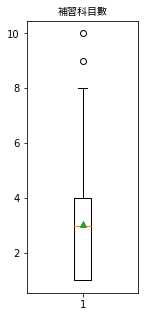

In [27]:
plt.figure(figsize=(2,5))
plt.boxplot(dm6['補習科目數'],showmeans=True)
plt.title('補習科目數',fontproperties=myfont)
plt.show()

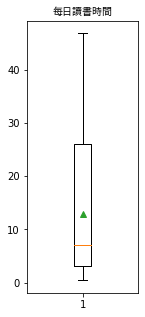

In [28]:
plt.figure(figsize=(2,5))
plt.boxplot(dm6['每日讀書時間'],showmeans=True)
plt.title('每日讀書時間',fontproperties=myfont)
plt.show()

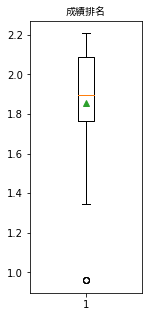

In [29]:
plt.figure(figsize=(2,5))
plt.boxplot(dm6['成績排名'],showmeans=True)
plt.title('成績排名',fontproperties=myfont)
plt.show()

In [30]:
maxoutlier=dm6['補習科目數'] > dm6['補習科目數'].mean() + 2.5* dm6['補習科目數'].std()
dm6[maxoutlier]

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
22,23,0,0,1,9,33.3,3.0,2.127722
23,24,0,1,1,10,46.9,1.0,2.064637


In [31]:
minoutlier=dm6['補習科目數'] < dm6['補習科目數'].mean() - 2.5* dm6['補習科目數'].std()
dm6[minoutlier]

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名


In [32]:
dm6[(maxoutlier | minoutlier)] 

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
22,23,0,0,1,9,33.3,3.0,2.127722
23,24,0,1,1,10,46.9,1.0,2.064637


In [33]:
#刪除法
dm7=dm6.drop(index=[22,23])
dm7

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
35,36,1,0,1,4,4.4,1.0,1.806253
5,6,1,1,2,1,0.4,1.0,0.959135
4,5,1,0,0,1,9.5,3.0,2.057936
45,46,1,1,1,1,1.3,3.0,1.765448
18,19,1,0,1,6,32.6,5.0,2.192806
...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,1.3,3.0,1.765448
46,47,0,0,1,2,4.3,1.0,1.871366
47,48,0,0,0,2,13.9,2.0,1.652403
48,49,0,1,1,3,3.6,1.0,1.921170


# 資料一般化

In [40]:
# 為了方便比較新舊欄位，增加"補習科目數區間"
columns = dm7.columns.tolist()
new_col = '補習科目數區間'
dm7.columns.insert(8, new_col)

# 將 numerical 轉換成 categorical 欄位
labels = [f' {i}' for i in range(1, 4)]
dm7[new_col] = pd.cut(x=dm7.補習科目數, bins=3, labels=labels)
dm8=pd.DataFrame(dm7)
dm8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名,補習科目數區間
35,36,1,0,1,4,4.4,1.0,1.806253,2
5,6,1,1,2,1,0.4,1.0,0.959135,1
4,5,1,0,0,1,9.5,3.0,2.057936,1
45,46,1,1,1,1,1.3,3.0,1.765448,1
18,19,1,0,1,6,32.6,5.0,2.192806,3
...,...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,1.3,3.0,1.765448,1
46,47,0,0,1,2,4.3,1.0,1.871366,1
47,48,0,0,0,2,13.9,2.0,1.652403,1
48,49,0,1,1,3,3.6,1.0,1.921170,1


# 相關係數

In [41]:
dm8.corr(method='pearson')  # kendall: spearman

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名
座號,1.000000,-0.211299,0.078206,0.018821,0.087991,-0.085157,-0.300427,-0.005863
頂大,-0.211299,1.000000,-0.126650,0.037716,0.062486,0.162176,0.251824,0.041932
性別,0.078206,-0.126650,1.000000,0.144644,-0.011486,0.119743,-0.032426,-0.085096
高中,0.018821,0.037716,0.144644,1.000000,-0.108959,-0.156504,-0.071688,-0.254135
補習科目數,0.087991,0.062486,-0.011486,-0.108959,1.000000,0.717716,0.216211,0.490392
每日讀書時間,-0.085157,0.162176,0.119743,-0.156504,0.717716,1.000000,0.454451,0.669221
區域,-0.300427,0.251824,-0.032426,-0.071688,0.216211,0.454451,1.000000,0.508271
成績排名,-0.005863,0.041932,-0.085096,-0.254135,0.490392,0.669221,0.508271,1.000000


In [42]:
dm8.corr(method='pearson')['補習科目數'].abs() >= 0.3

座號        False
頂大        False
性別        False
高中        False
補習科目數      True
每日讀書時間     True
區域        False
成績排名       True
Name: 補習科目數, dtype: bool

In [43]:
dm8.corr(method='pearson')['每日讀書時間'].abs() >= 0.3

座號        False
頂大        False
性別        False
高中        False
補習科目數      True
每日讀書時間     True
區域         True
成績排名       True
Name: 每日讀書時間, dtype: bool

In [44]:
dm8

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名,補習科目數區間
35,36,1,0,1,4,4.4,1.0,1.806253,2
5,6,1,1,2,1,0.4,1.0,0.959135,1
4,5,1,0,0,1,9.5,3.0,2.057936,1
45,46,1,1,1,1,1.3,3.0,1.765448,1
18,19,1,0,1,6,32.6,5.0,2.192806,3
...,...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,1.3,3.0,1.765448,1
46,47,0,0,1,2,4.3,1.0,1.871366,1
47,48,0,0,0,2,13.9,2.0,1.652403,1
48,49,0,1,1,3,3.6,1.0,1.921170,1


In [45]:
dm7

,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名,補習科目數區間
35,36,1,0,1,4,4.4,1.0,1.806253,2
5,6,1,1,2,1,0.4,1.0,0.959135,1
4,5,1,0,0,1,9.5,3.0,2.057936,1
45,46,1,1,1,1,1.3,3.0,1.765448,1
18,19,1,0,1,6,32.6,5.0,2.192806,3
...,...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,1.3,3.0,1.765448,1
46,47,0,0,1,2,4.3,1.0,1.871366,1
47,48,0,0,0,2,13.9,2.0,1.652403,1
48,49,0,1,1,3,3.6,1.0,1.921170,1


In [48]:
dm8=dm7
columns = dm8.columns.tolist()
new_col = '時間與轉換共變'
dm8.columns.insert(10, new_col)
for i in range(dm8.shape[0]):
   dm8[new_col]=dm8.每日讀書時間 * dm8.補習科目數
dm8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,座號,頂大,性別,高中,補習科目數,每日讀書時間,區域,成績排名,補習科目數區間,時間與轉換共變
35,36,1,0,1,4,4.4,1.0,1.806253,2,17.6
5,6,1,1,2,1,0.4,1.0,0.959135,1,0.4
4,5,1,0,0,1,9.5,3.0,2.057936,1,9.5
45,46,1,1,1,1,1.3,3.0,1.765448,1,1.3
18,19,1,0,1,6,32.6,5.0,2.192806,3,195.6
...,...,...,...,...,...,...,...,...,...,...
45,46,1,1,1,1,1.3,3.0,1.765448,1,1.3
46,47,0,0,1,2,4.3,1.0,1.871366,1,8.6
47,48,0,0,0,2,13.9,2.0,1.652403,1,27.8
48,49,0,1,1,3,3.6,1.0,1.921170,1,10.8


# 判斷解釋力

## Y=類別 X=類別

In [49]:
!pip install scipy

In [50]:
from scipy.stats import chi2_contingency 
import pandas as pd
import numpy as np
dm9=dm8
dm9=pd.DataFrame(dm9)
cross_tab = pd.pivot_table(data=dm9, values='座號', 
              index='頂大', columns='性別', margins=True, aggfunc=np.sum)
cross_tab

性別,0,1,All
頂大,,,
0,442,561,1003
1,485,318,803
All,927,879,1806


In [53]:
dm9=dm8
dm9=pd.DataFrame(dm9)
cross_tab = pd.pivot_table(data=dm9, values='座號', 
              index='頂大', columns='高中', margins=True, aggfunc=np.sum)
cross_tab

高中,0,1,2,All
頂大,,,,
0,322,348,333,1003
1,69,707,27,803
All,391,1055,360,1806


In [54]:
import scipy.stats
scipy.stats.chi2_contingency(cross_tab, correction = False)
# 檢定值、P值、自由度、檢測內容

(530.3233444653422,
 2.460458842571567e-111,
 6,
 array([[ 217.15005537,  585.91638981,  199.93355482, 1003.        ],
        [ 173.84994463,  469.08361019,  160.06644518,  803.        ],
        [ 391.        , 1055.        ,  360.        , 1806.        ]]))

In [55]:
p_value = scipy.stats.chi2_contingency(cross_tab, correction = False)[1]
p_value

2.460458842571567e-111

## Y=類別 X=連續

In [56]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
logit = sm.Logit(dm8['頂大'], dm8['補習科目數'])
# 擬合模型
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.691593
         Iterations 3


In [59]:
logit = sm.Logit(dm8['頂大'], dm8['每日讀書時間'])
# 擬合模型
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.684227
         Iterations 4


In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     頂大   No. Observations:                   78
Model:                          Logit   Df Residuals:                       77
Method:                           MLE   Df Model:                            0
Date:                Sat, 23 Oct 2021   Pseudo R-squ.:                0.001769
Time:                        15:21:05   Log-Likelihood:                -53.944
converged:                       True   LL-Null:                       -54.040
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
補習科目數          0.0324      0.066      0.492      0.623      -0.097       0.161
==============================================================================
"""